**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Francisco Marmolejo Martinez
*   MATRÍCULA: A01794882

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/TC4029 - Ciencia y analítica de datos/Actividad4/"
os.chdir(DIR)

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [191]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

Numerico
*   person_age
*   person_income
*   person_emp_length
*   loan_amnt
*   loan_int_rate
*   loan_status
*   loan_percent_income
*   cb_person_cred_hist_length

Cualitativas
*   person_home_ownership
*   loan_intent
*   loan_grade
*   loan_status
*   cb_person_default_on_file













In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


 2. Determina el porcentaje de valores faltantes por columna.

In [193]:
percent_missing = df.isna().sum() * 100/len(df)
df2 = pd.DataFrame({'percent_missing': percent_missing})
df2

,percent_missing
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [194]:
meanV = df.mean(numeric_only=True, skipna=True)
meanV.drop('loan_status')

person_age                       27.734600
person_income                 66074.848470
person_emp_length                 4.789686
loan_amnt                      9589.371106
loan_int_rate                    11.011695
loan_percent_income               0.170203
cb_person_cred_hist_length        5.804211
dtype: float64

In [195]:
minV = df.min(numeric_only=True, skipna=True)
minV.drop('loan_status')

person_age                      20.00
person_income                 4000.00
person_emp_length                0.00
loan_amnt                      500.00
loan_int_rate                    5.42
loan_percent_income              0.00
cb_person_cred_hist_length       2.00
dtype: float64

In [196]:
maxV = df.max(numeric_only=True, skipna=True)
maxV.drop('loan_status')

person_age                        144.00
person_income                 6000000.00
person_emp_length                 123.00
loan_amnt                       35000.00
loan_int_rate                      23.22
loan_percent_income                 0.83
cb_person_cred_hist_length         30.00
dtype: float64

In [197]:
standar_deviation = df.std(numeric_only=True, skipna=True)
standar_deviation.drop('loan_status')

person_age                        6.348078
person_income                 61983.119168
person_emp_length                 4.142630
loan_amnt                      6322.086646
loan_int_rate                     3.240459
loan_percent_income               0.106782
cb_person_cred_hist_length        4.055001
dtype: float64

In [198]:
quantiles = df.quantile([.25, .5, .75], numeric_only=True)
quantiles.pop('loan_status')
quantiles

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0.25,23.0,38500.0,2.0,5000.0,7.90,0.09,3.0
0.50,26.0,55000.0,4.0,8000.0,10.99,0.15,4.0
0.75,30.0,79200.0,7.0,12200.0,13.47,0.23,8.0


**person_age** es tiene una **skew positiva** ya que la media(27.73459992019889) es mas grande que la moda(23).

**person_age** es **Leptokurtic** por que su **Kurtosis**(18.560824765312866) es mayor a 3.

In [199]:
df['person_age'].kurt()

18.560824765312866

In [200]:
df['person_age'].skew()

2.5813925261849846

In [201]:
df['person_age'].mean()

27.73459992019889

In [202]:
df.mode(dropna=False, numeric_only=True)['person_age']

0    23
Name: person_age, dtype: int64

**loan_int_rate** es tiene una skew positiva ya que la media(11.011694892245036) es mas grande que la moda(7.51).

**loan_int_rate** es **Platykurtic** por que es un valor negativo(-0.6716091079813706).

In [203]:
df['loan_int_rate'].kurt()

-0.6716091079813706

In [204]:
df['loan_int_rate'].skew()

0.2085503016908977

In [205]:
df['loan_int_rate'].mean()

11.011694892245036

In [206]:
df.mode(dropna=True, numeric_only=True)['loan_int_rate']

0    7.51
Name: loan_int_rate, dtype: float64

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

¿Se corresponde con lo obtenido en el cálculo de asimetría?

Es facil determinar su distribucion a simple vista. Es asimetrica positiva ya que se inclina hacia la izquierda.

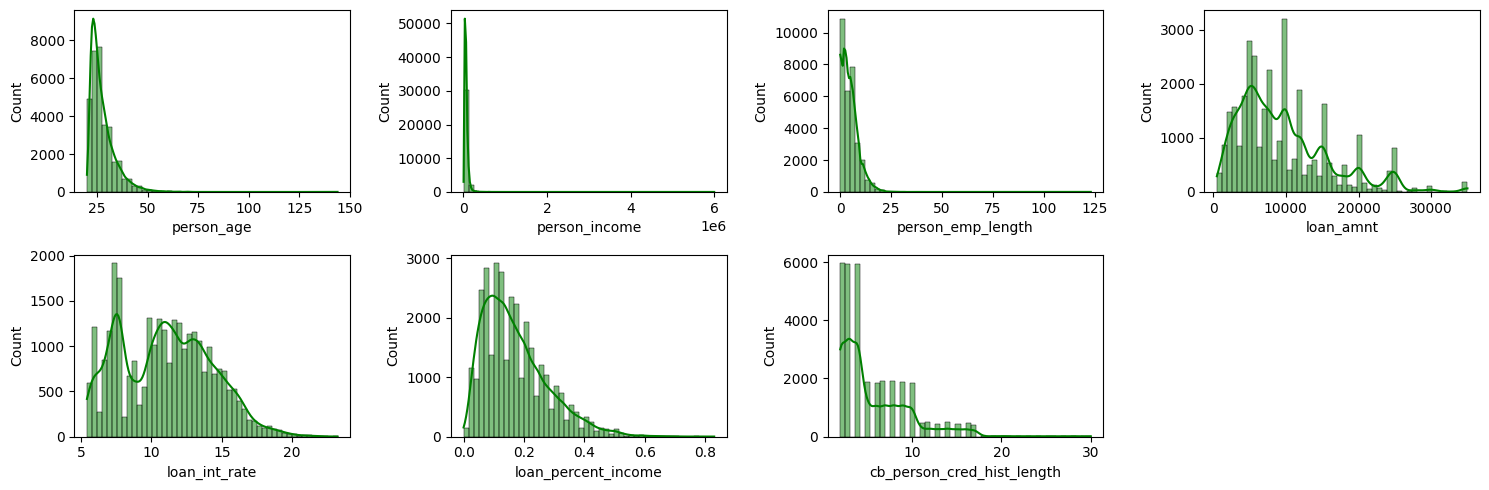

In [207]:
numTypes = df.select_dtypes(include=np.number).columns
numTypes = numTypes.drop('loan_status')
plt.figure(figsize=(15, 5))
for i, col in enumerate(numTypes):
  plt.subplot(2,4, i+1)
  sns.histplot(df[col], color='green', bins=50, kde=True)

plt.tight_layout()
plt.show()


5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

<Axes: >

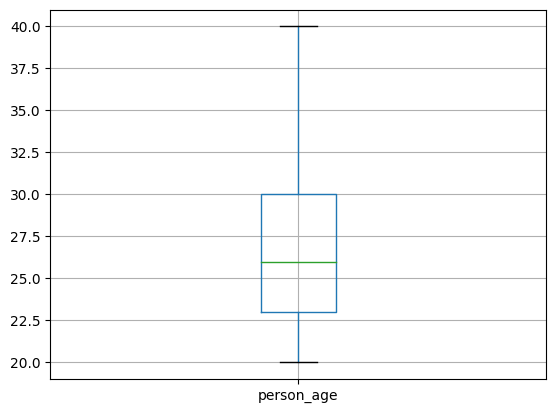

In [208]:
df.boxplot(column =['person_age'], showfliers=False)

<Axes: >

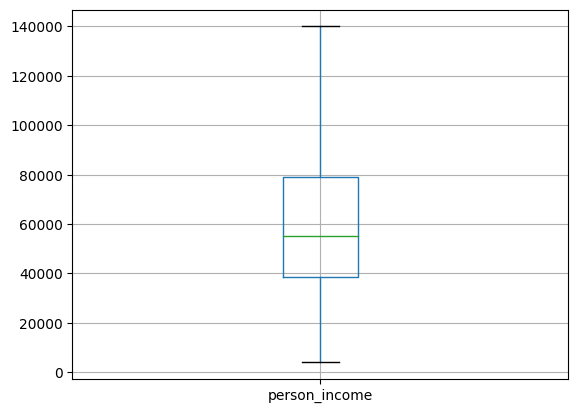

In [209]:
df.boxplot(column =['person_income'], showfliers=False)

<Axes: >

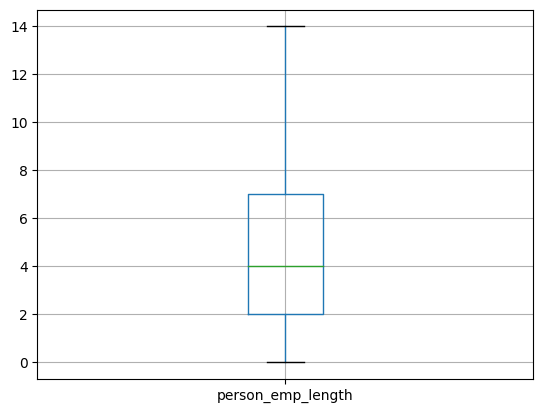

In [210]:
df.boxplot(column =['person_emp_length'], showfliers=False)

<Axes: >

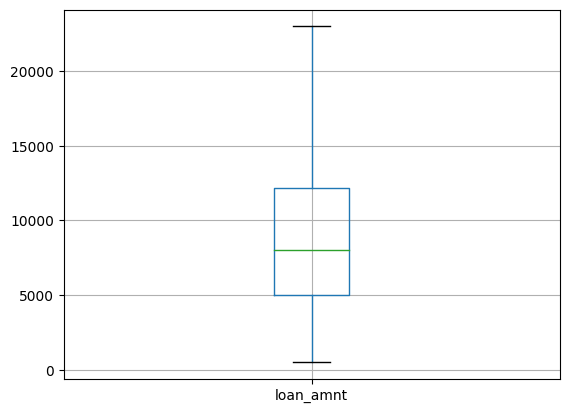

In [211]:
df.boxplot(column =['loan_amnt'], showfliers=False)

<Axes: >

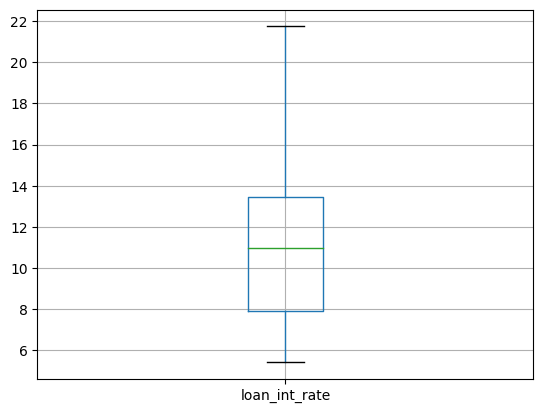

In [212]:
df.boxplot(column =['loan_int_rate'], showfliers=False)

<Axes: >

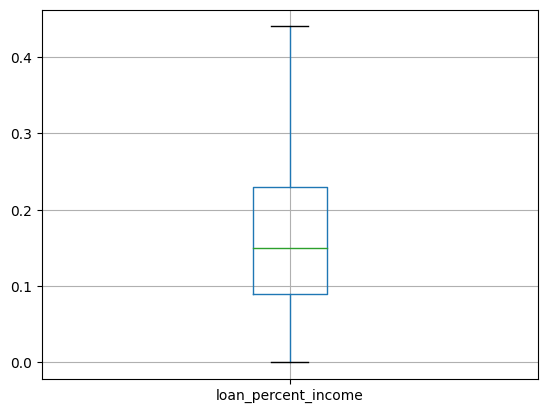

In [213]:
df.boxplot(column =['loan_percent_income'], showfliers=False)

<Axes: >

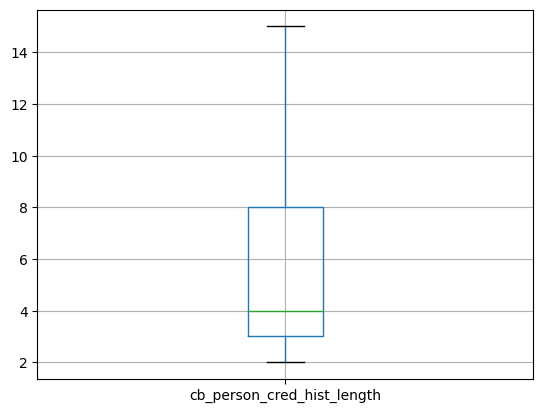

In [214]:
df.boxplot(column =['cb_person_cred_hist_length'], showfliers=False)

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [215]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()`

person_home_ownership
*   Tendencia central(**RENT**)
*   Cardinalidad(**4**)
*   Recuentos unicos
>
>* RENT        16446
>*   MORTGAGE  -  13444
>*   OWN       -   2584
>*   OTHER     -    107

loan_intent
*   Tendencia central(**EDUCATION**)
*   Cardinalidad(**6**)
*   Recuentos unicos
>* EDUCATION          -  6453
>* MEDICAL            -  6071
>* VENTURE            -  5719
>* PERSONAL           -  5521
>* DEBTCONSOLIDATION  -  5212
>* HOMEIMPROVEMENT    -  3605

loan_grade
*   Tendencia central(**A**)
*   Cardinalidad(**7**)
*   Recuentos unicos
>* A  -  10777
>* B  -  10451
>* C  -   6458
>* D  -   3626
>* E  -    964
>* F  -    241
>* G  -     64

loan_status
*   Tendencia central(**0**)
*   Cardinalidad(**2**)
*   Recuentos unicos
>* 0 -   25473
>* 1 -    7108

cb_person_default_on_file
*   Tendencia central(**N**)
*   Cardinalidad(**2**)
*   Recuentos unicos
>* N  -  26836
>* Y  -  5745

In [216]:
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [217]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [218]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [219]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [220]:
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [221]:
objTypes = df.select_dtypes(include='object').columns

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df) `

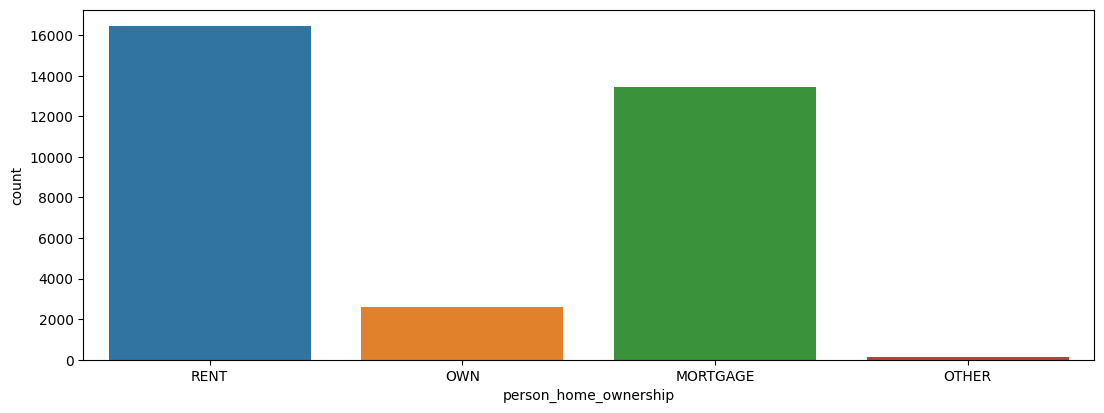

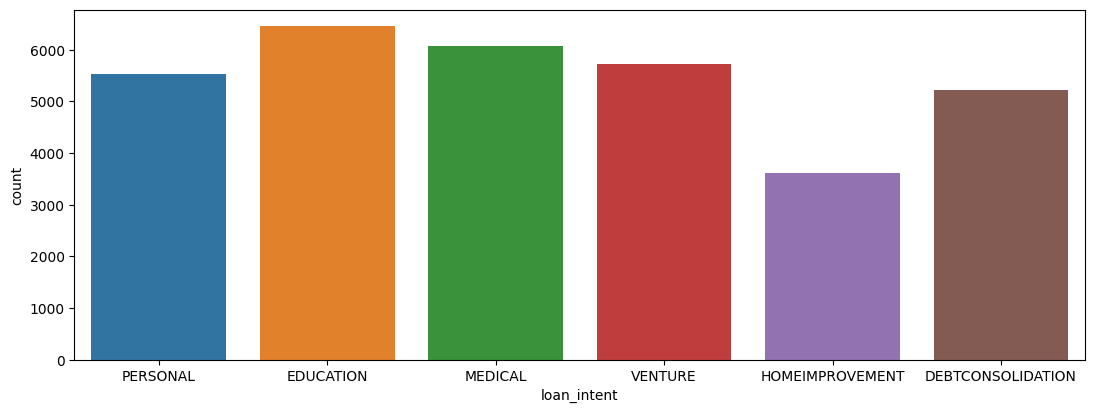

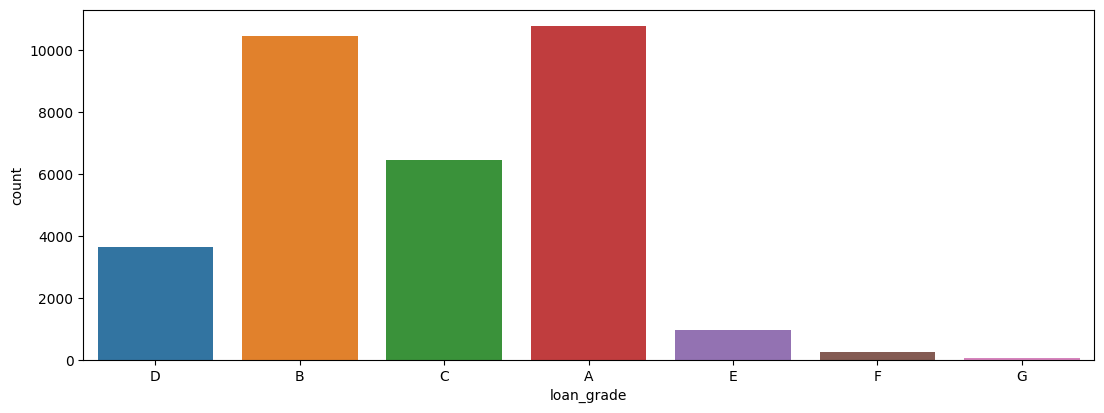

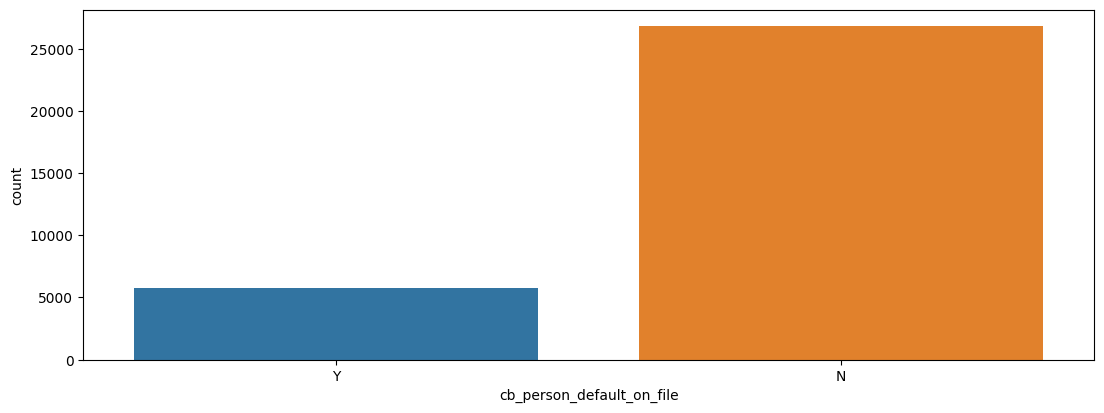

In [222]:
for i, col in enumerate(objTypes):
  plt.figure(figsize=(60, 10))
  plt.subplot(2,4, i+1)
  sns.countplot(x=col, data=df)
  plt.show()



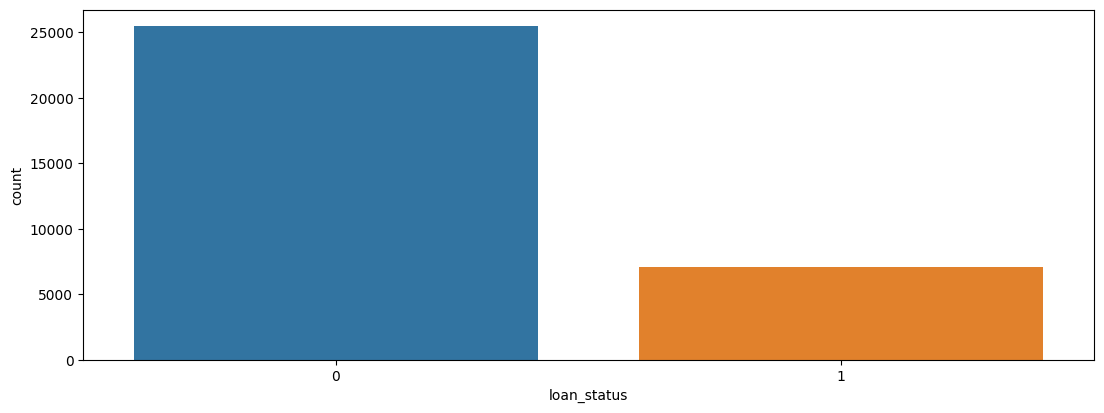

In [223]:
plt.figure(figsize=(60, 10))
plt.subplot(2,4, i+1)
sns.countplot(x='loan_status', data=df)
plt.show()

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `load_status`. Interpreta el resultado.

Entre mas alto es el loan_percent_income la tendencia de loan_status 1 incrementa.

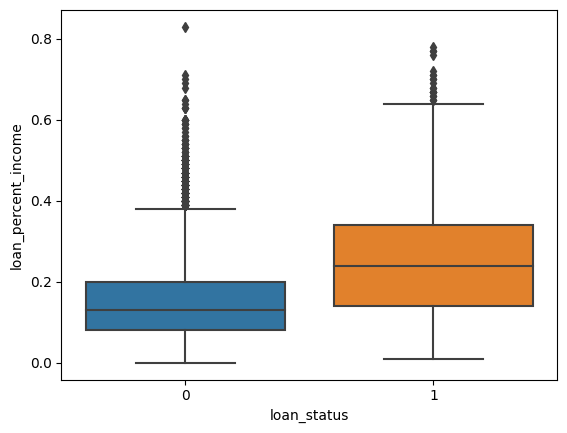

In [224]:

sns.boxplot(x="loan_status",y="loan_percent_income",data=df)
plt.show()


 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

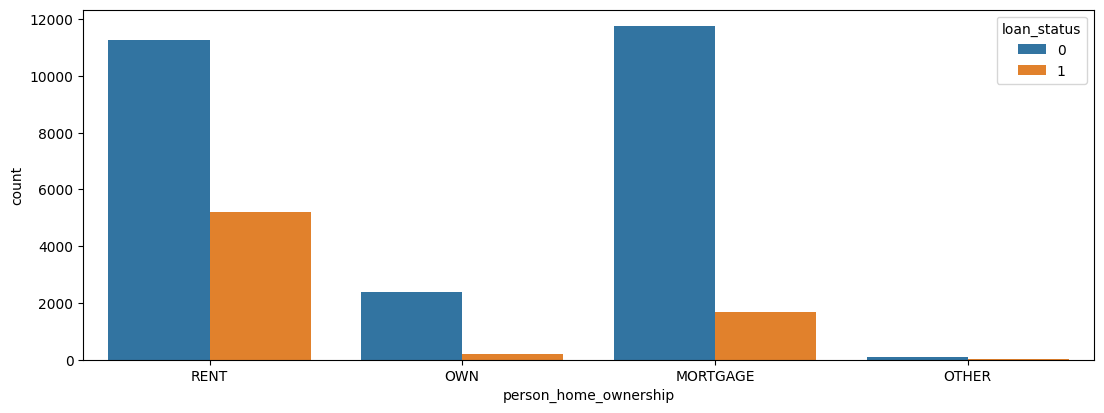

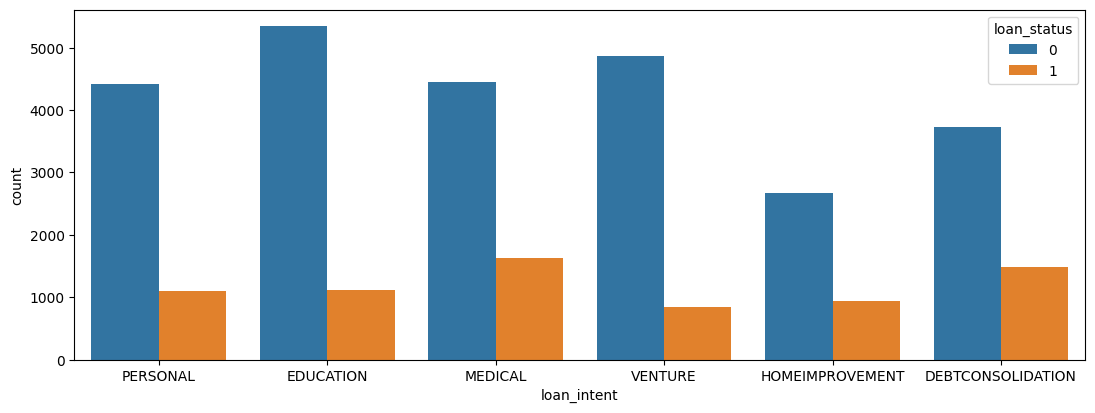

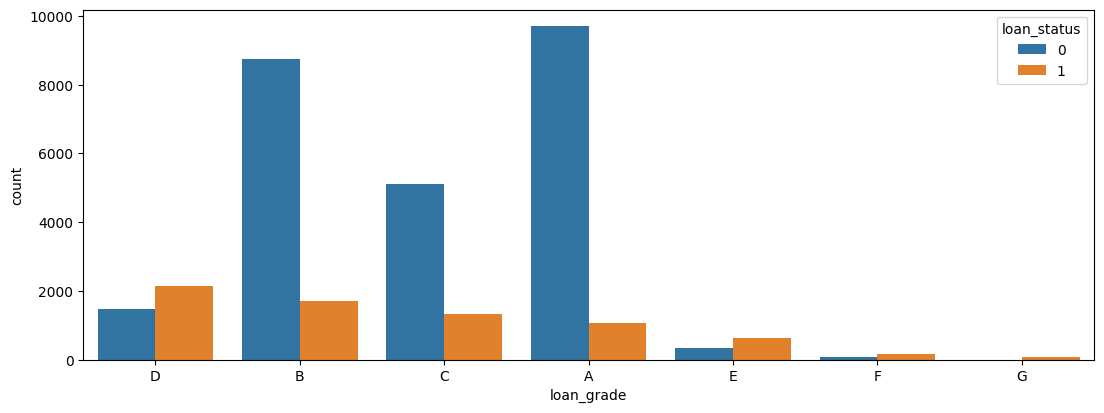

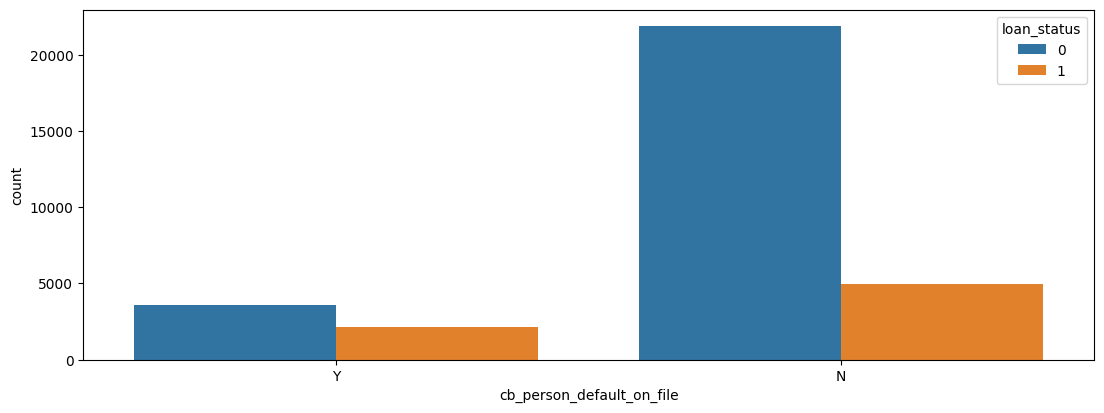

In [225]:
for i, col in enumerate(objTypes):
  plt.figure(figsize=(60, 10))
  plt.subplot(2,4, i+1)
  sns.countplot(x=df[col], hue=df['loan_status'])
  plt.show()

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

**loan_percent_income**

In [226]:
Tcorrelation = df.corr(method='pearson')
Tcorrelation

<ipython-input-226-6004b698a5e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Tcorrelation = df.corr(method='pearson')


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


<Axes: >

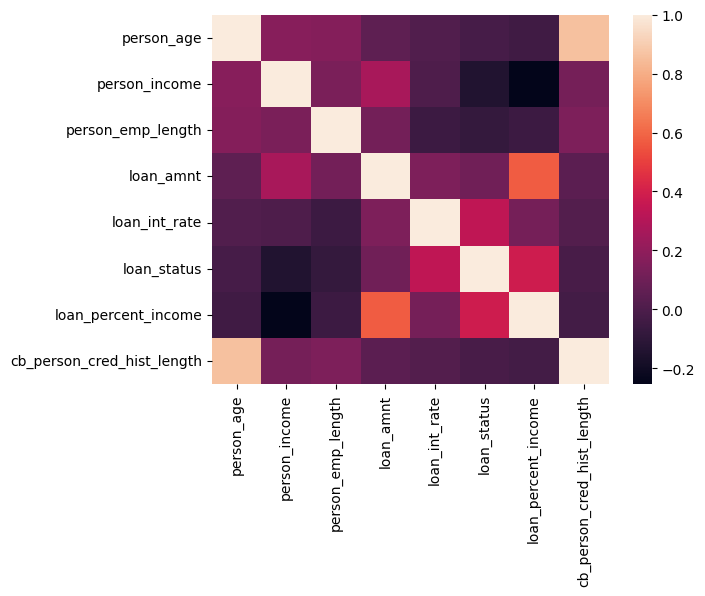

In [227]:
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
            yticklabels=Tcorrelation.columns)